# CNN with MNIST dataset



In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

## Load and look at MNIST data

MNIST data are available from keras directly.

Note the shape of the data array: (number_of_samples, dimension_1, dimension_2)

In [48]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images, train_labels = train_images[:11000], train_labels[:11000]
test_images, test_labels = test_images[:1000], test_labels[:1000]
display(train_images.shape)
display(len(train_labels))
display(len(test_labels))

(11000, 28, 28)

11000

1000

### A look at the data

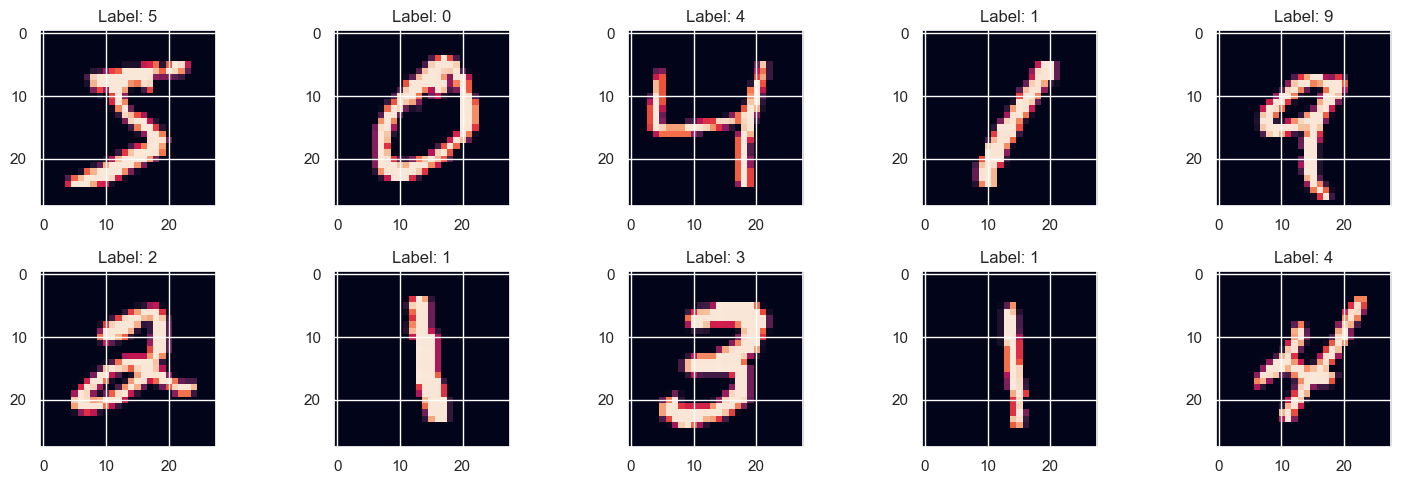

In [31]:
rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize=(15,5))

for i in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=("Label: "+str(train_labels[i]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(train_images[i])
fig.tight_layout()    
plt.show()


## Prepare data subsets

The data are already separated in train and test sets at the loading step. This is specific to pre-processed datasets. Things to do:

* the labels are not in the categorical format. This must be done here.
* The input data are not in the appropriate shape. The images are in black and white, with only one array, and without any dimension for the channels. The channel dimension must be introduced for Keras.
* The input data are not normalized. This must be done.

In [49]:
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

NameError: name 'rain_labels' is not defined

In [50]:
print((train_images.max(), test_images.max()))
print((train_images.min(), test_images.min()))

(255, 255)
(0, 0)


In [51]:
train_images_res = train_images.reshape((11000, 28, 28, 1))/255
test_images_res  = test_images.reshape((1000, 28, 28, 1))/255

### QUIZZ

* What are the differences between the label arrays and the categorized label arrays? (shape and nature of values)


## Design a first model

In [52]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Input(shape=(28, 28, 1)))
# Conv layer 1
cnn.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2,2)))
cnn.add(keras.layers.Dropout(0.2))
# Conv layer 2
cnn.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2,2)))
cnn.add(keras.layers.Dropout(0.2))
## Introduction of the classifier
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,258 (122.10 KB)

 Trainable params: 31,258 (122.10 KB)

 Non-trainable params: 0 (0.00 B)

## Training and checking overfitting

In [53]:
history = cnn.fit(x = train_images_res,
                  y = train_labels_cat,
                  validation_split = 0.2,
                  verbose = 1,
                  epochs = 5,
                  batch_size = 64)

Epoch 1/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5856 - loss: 1.2698 - val_accuracy: 0.8709 - val_loss: 0.3751
Epoch 2/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8919 - loss: 0.3622 - val_accuracy: 0.9245 - val_loss: 0.2454
Epoch 3/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9292 - loss: 0.2353 - val_accuracy: 0.9455 - val_loss: 0.1828
Epoch 4/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9454 - loss: 0.1777 - val_accuracy: 0.9495 - val_loss: 0.1513
Epoch 5/5
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9507 - loss: 0.1563 - val_accuracy: 0.9595 - val_loss: 0.1216


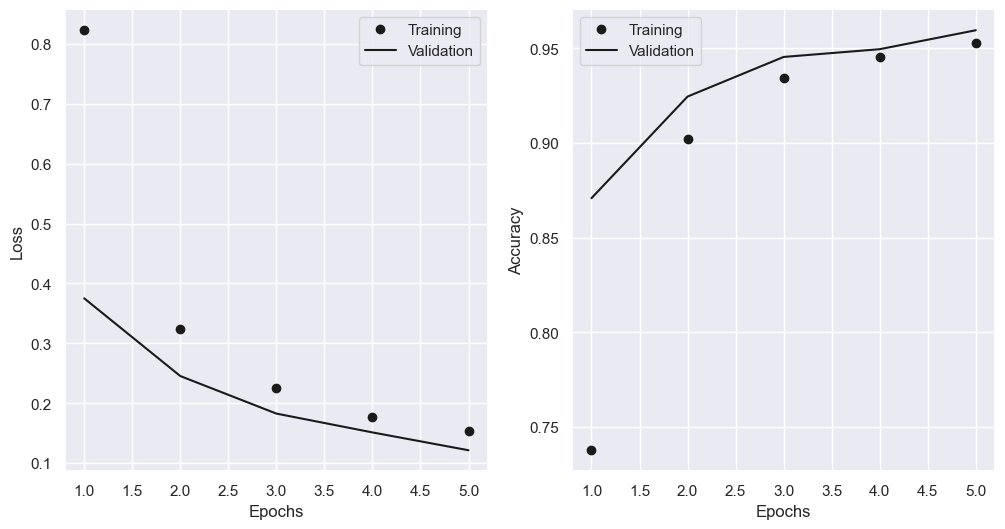

In [54]:
loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
epochs = range(1, len(loss)+1 )

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
#ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(epochs, loss, 'ko', label = "Training" )
ax1.plot(epochs, val_loss, 'k', label = "Validation" )
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2 = plt.subplot(122)
#ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax2.plot(epochs, acc, 'ko', label = "Training" )
ax2.plot(epochs, val_acc, 'k', label = "Validation" )
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

## Make prediction with test dataset

The output is in the categorical format. For visualisation, it is changed to label format.

In [55]:
pred_labels_cat = cnn.predict(test_images_res)
pred_labels_cat

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[4.1785165e-07, 4.0661376e-07, 9.7357060e-06, ..., 9.9992049e-01,
        2.3625535e-07, 5.7549951e-06],
       [1.1169409e-03, 1.0672219e-02, 9.8575377e-01, ..., 5.3583653e-09,
        9.0903428e-04, 1.0410515e-09],
       [1.2844552e-05, 9.9951994e-01, 3.7992166e-05, ..., 5.2776533e-05,
        8.0371989e-05, 6.0818138e-06],
       ...,
       [9.9999976e-01, 9.3570998e-11, 3.4052483e-09, ..., 5.0317267e-10,
        5.9267819e-08, 4.1734097e-08],
       [2.8150063e-02, 1.3360224e-04, 1.1259158e-03, ..., 1.9058637e-02,
        2.2416988e-01, 7.1308780e-01],
       [2.0499327e-05, 7.1079188e-07, 2.3777526e-05, ..., 2.1514194e-02,
        2.7008029e-04, 9.7211850e-01]], dtype=float32)

In [56]:
pred_labels_cat.shape

(1000, 10)

In [58]:
pred_labels = np.array([np.argmax(pred_labels_cat[i,:]) for i in range(1000)])
random_labels = np.random.randint(0,10,1000)

In [59]:
random_labels.shape

(1000,)

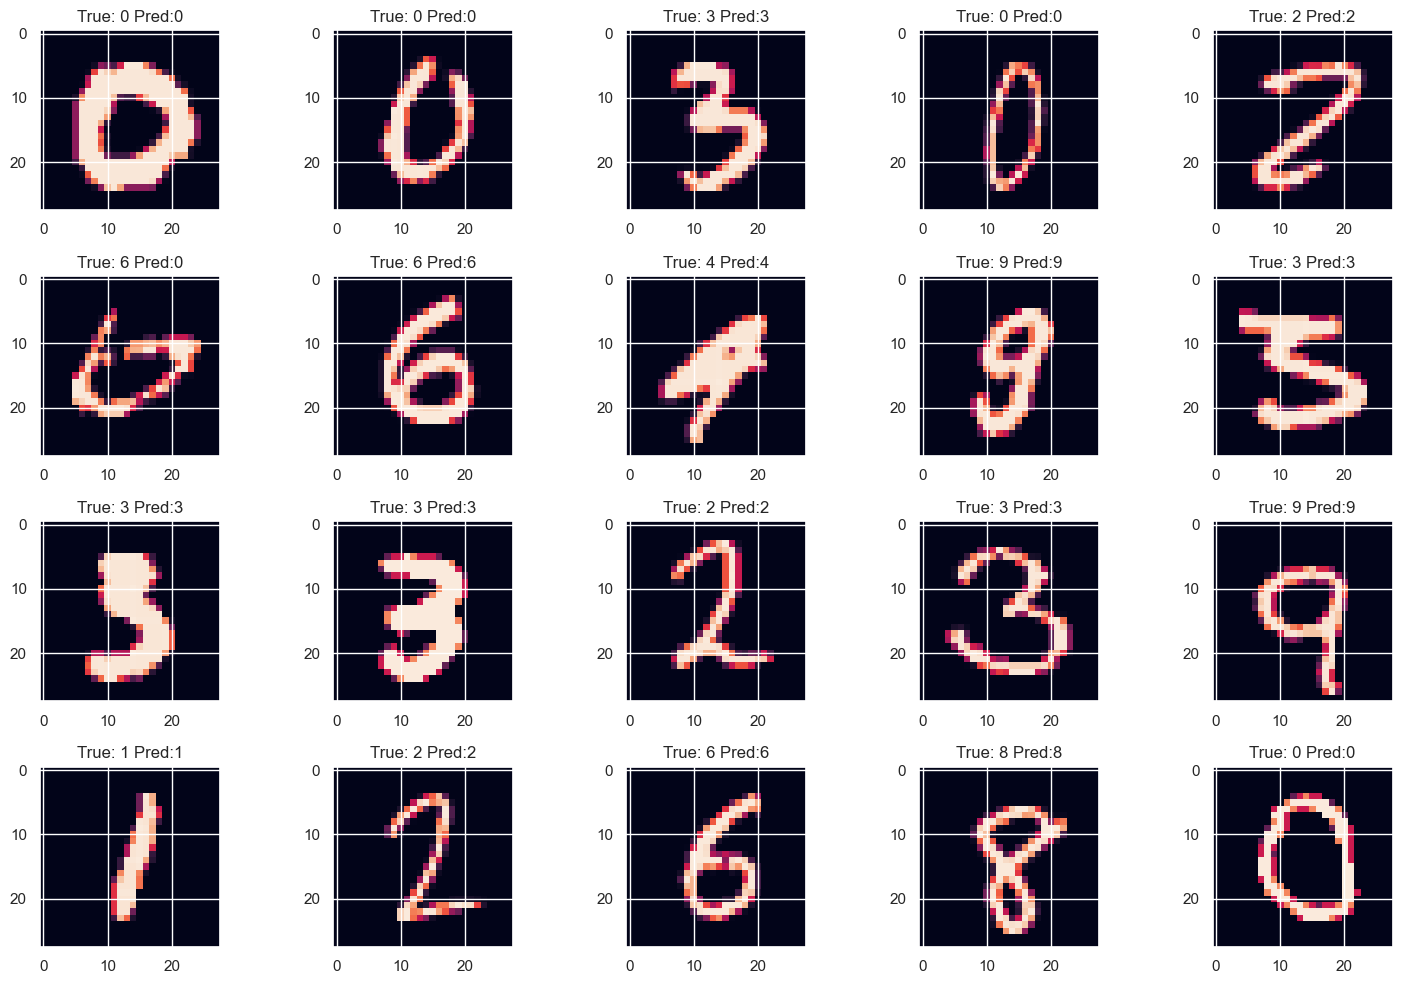

In [60]:
rows = 4
cols = 5
start = 440
axes=[]
fig=plt.figure(figsize=(15,10))

for i in range(rows*cols):
    j = start+i
    axes.append( fig.add_subplot(rows, cols, i+1) )
    #subplot_title=("T: "+str(test_labels[j])+" P:"+str(pred_labels[j])+" R:"+str(random_labels[j]))
    subplot_title=("True: "+str(test_labels[j])+" Pred:"+str(pred_labels[j]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(test_images[j])
fig.tight_layout()    
plt.show()


In [61]:
cnn.evaluate(test_images_res, test_labels_cat)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9751 - loss: 0.0930


[0.12856359779834747, 0.9610000252723694]